In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing #import as inmax_scale,StandardScaler,LabelEncoder
import sklearn.metrics as me
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# task 1

# load the dataset

In [2]:
data=pd.read_csv('DS2_C5_S2_Mtcars_Data_Practice.csv')

# task 1.2

# preprocess the data 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [1]:
from sklearn import preprocessing
def feature_scaling(scale):
    new_df=data.select_dtypes(exclude=['object','category'])
    if scale=='minmax':
        scaler=preprocessing.MinMaxScaler()
    else:
        scaler=preprocessing.StandardScaler()
    df_scale=pd.DataFrame(scaler.fit_transform(new_df),columns=new_df.columns)
    return df_scale
        

final_df=feature_scaling('minmax')
final_df.head()

NameError: name 'data' is not defined

In [4]:
y=final_df['mpg']
X=final_df
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=100)


# task 1.3

# visualize the data set as pearplot

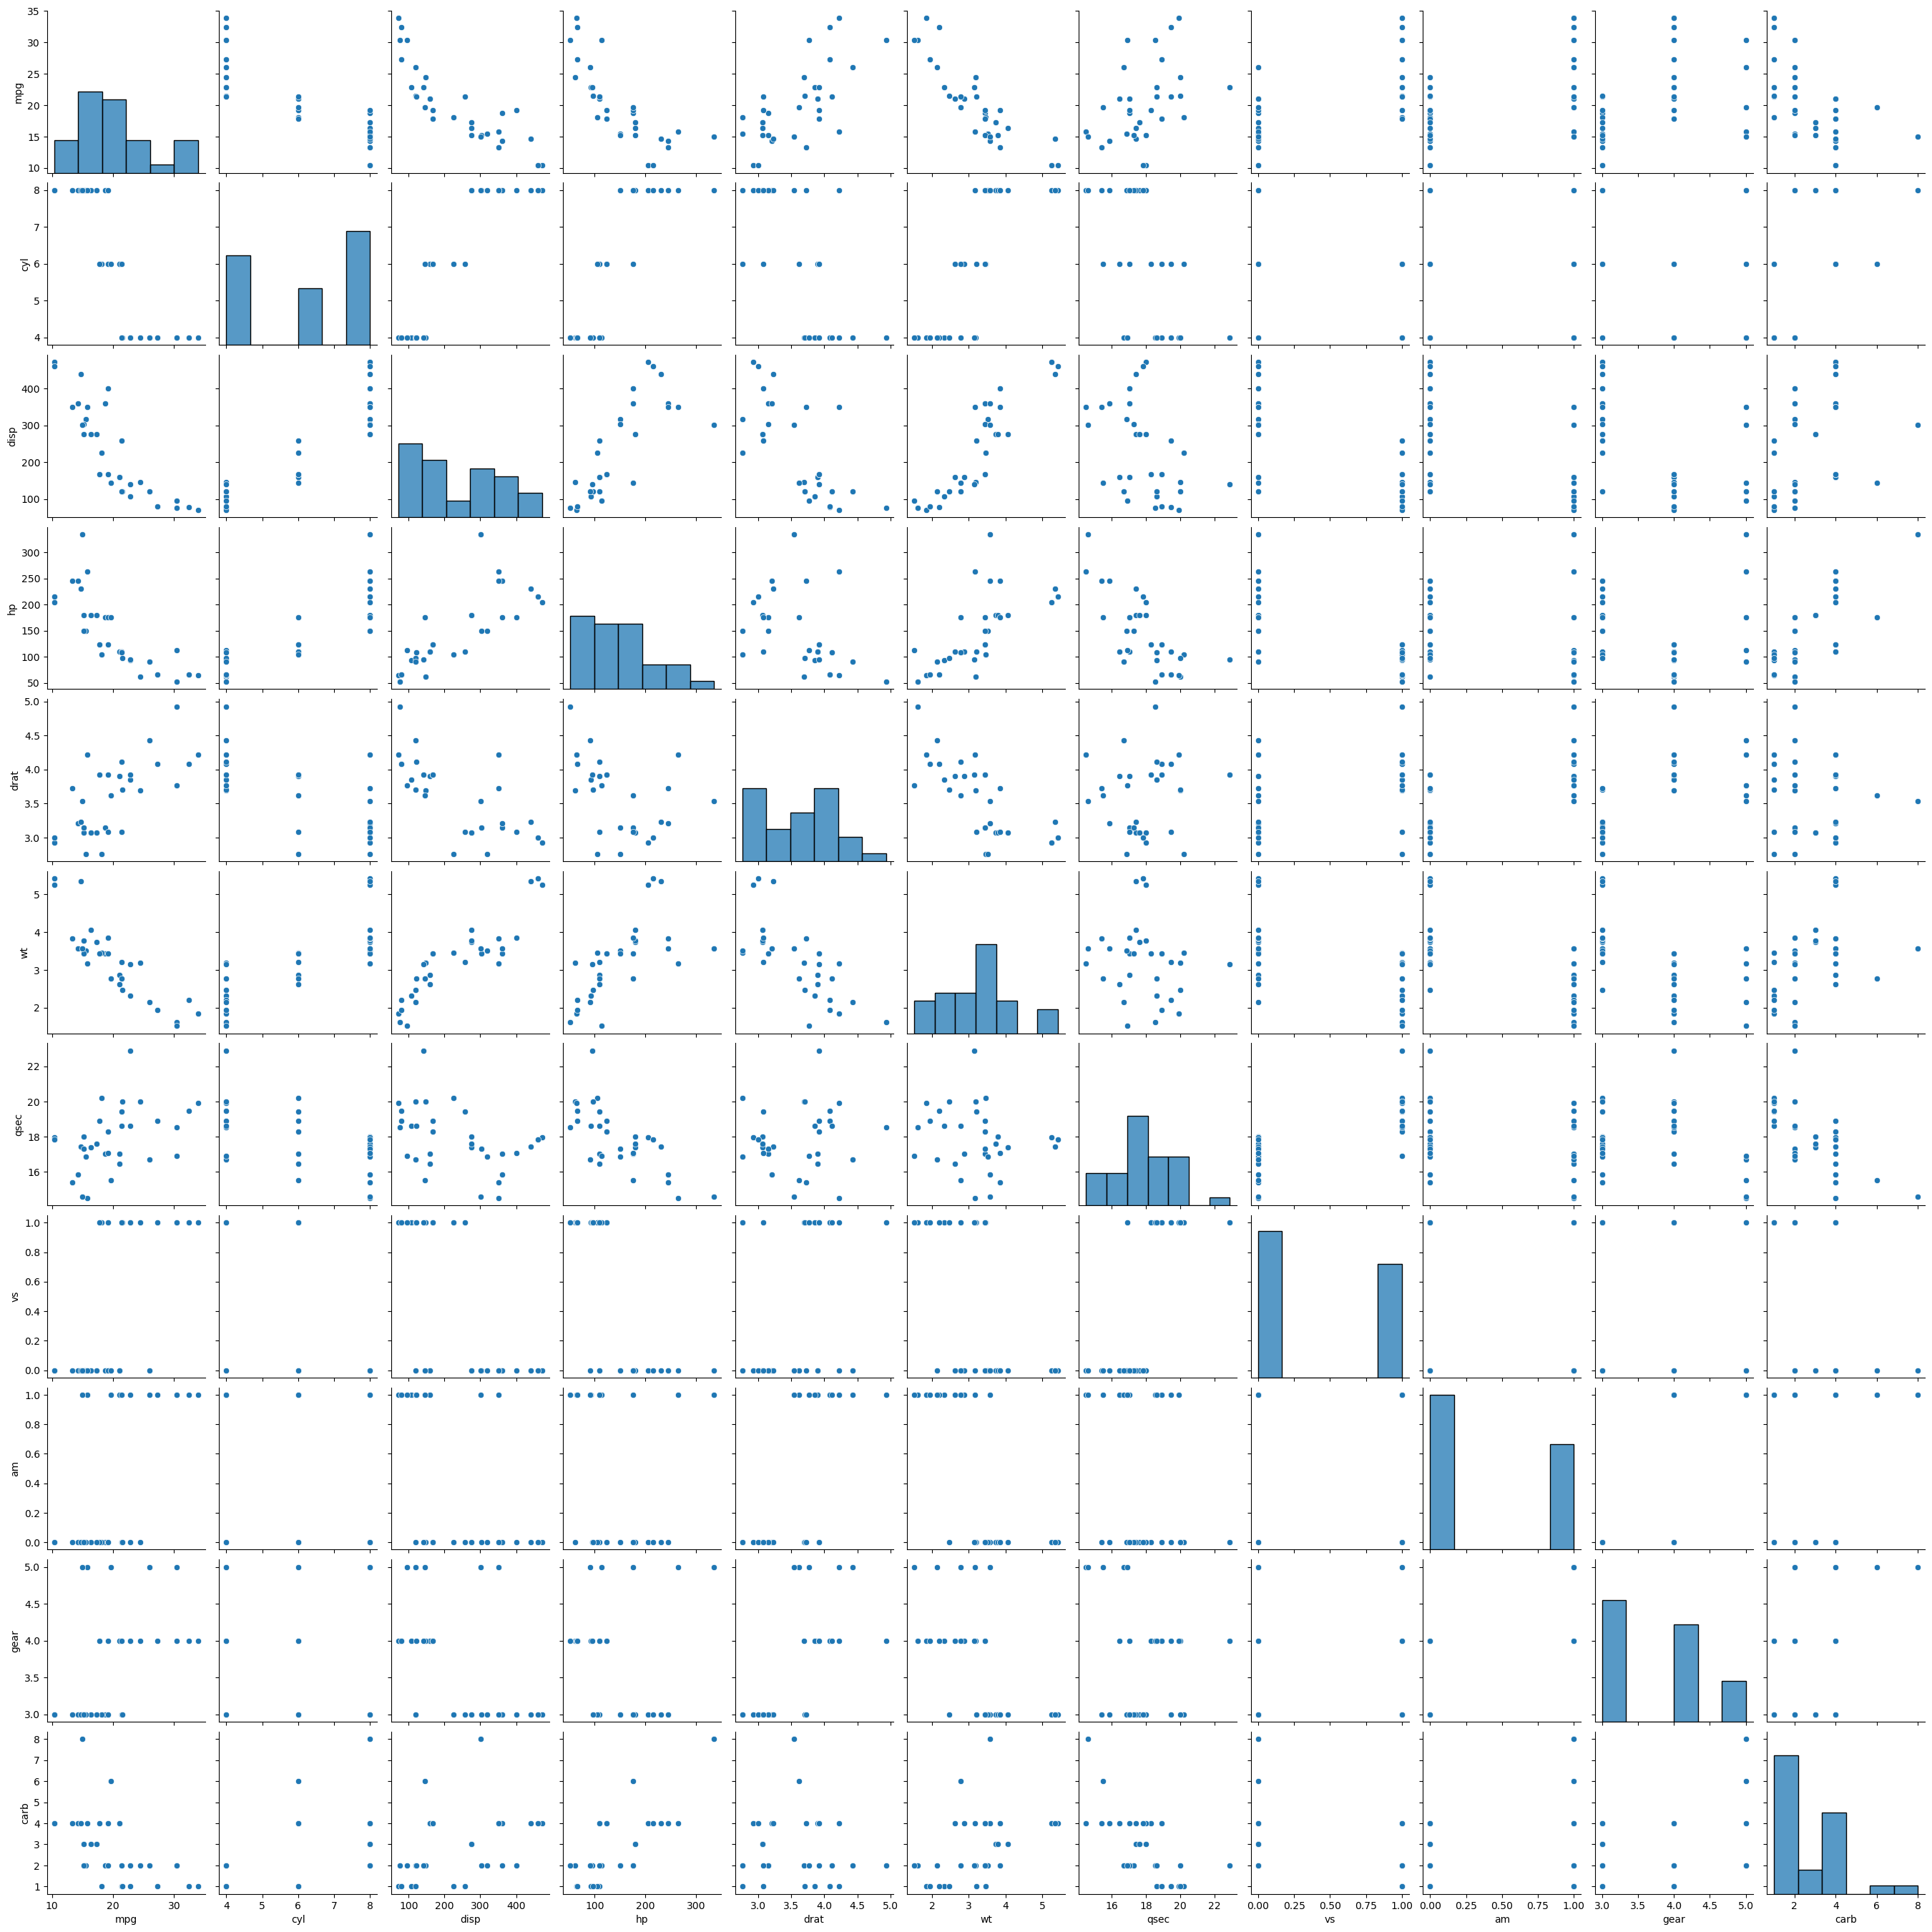

In [12]:
sns.pairplot(data);

# task 2

# build a simple linear model with one independent feature

In [5]:
x=data[['cyl']]
y=data[['mpg']]

# task 2.2

# evaluate intercept slop and r^2 value

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=100)


In [8]:
LR=LinearRegression().fit(X_train,y_train)
LR.score(X_train,y_train)

0.6804347146528882

In [9]:
print('Intercept',LR.intercept_)
print('Slope',LR.coef_)
print('R_Square',LR.score(X_train,y_train))

Intercept [35.97066015]
Slope [[-2.61271394]]
R_Square 0.6804347146528882


# task 2.3

# write the linear equation of the model using intercept and slope values

In [ ]:
#y= a+bx

# task 2.4

# evalvate the model by calculating mse, rmse values

In [12]:
pred_y=LR.predict(X_test)
MSE=mean_squared_error(pred_y,y_test)
MAE=mean_absolute_error(pred_y,y_test)

In [13]:
print('R_Square',LR.score(X_train,y_train))
print('MSE',MSE)
print('RMSE',mean_squared_error(pred_y,y_test,squared=False))
print('MAE',MAE)


R_Square 0.6804347146528882
MSE 7.939101721056183
RMSE 2.8176411625784046
MAE 1.8460391198044008


# task 2..5

# fit linear regression model to the data set (line plot ) and visualize  it with the data

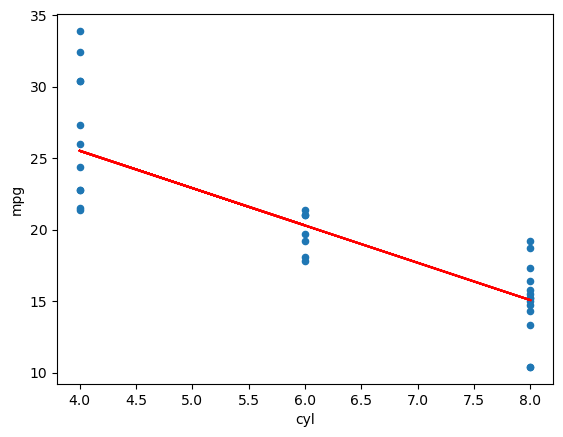

In [14]:
fig,ax=plt.subplots()
data.plot.scatter(x='cyl',y='mpg',ax=ax)
plt.plot(X_test.squeeze(),pred_y.squeeze(),color='r')
plt.show()

# task 3

# rebuilt the linear model with one more indepedent  feature

In [35]:
x1=data[['cyl','disp']].values.reshape(-1,2)
y1=data['mpg']

# task 3.2

# evaluate intercept slop and r^2 value

In [36]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.3,random_state=142)


In [37]:
LR=LinearRegression().fit(x1_train,y1_train)
LR.score(x1_train,y1_train)

0.8164458902653322

In [38]:
pred_y=LR.predict(x1_test)

In [39]:
print('Intercept',LR.intercept_)
print('Slope',LR.coef_)
print('R_Square',LR.score(x1_train,y1_train))

Intercept 35.08725153867601
Slope [-1.23330958 -0.02977819]
R_Square 0.8164458902653322


# task 3.3

# write the linear equation of the model using intercept and slope values

In [ ]:
#y1=a1+b1x1
#y2=a2+b2x2

# task 3.4

# evaluate the mode by calculating mse,rmse values

In [22]:
MSE=mean_squared_error(pred_y,y_test)
MAE=mean_absolute_error(pred_y,y_test)

In [23]:
print('MSE',MSE)
print('RMSE',mean_squared_error(pred_y,y_test,squared=False))
print('MAE',MAE)

MSE 11.061326842094935
RMSE 3.3258573093406962
MAE 2.762238283264652


# task 4

# rebuilt the linear model with one more indepedent feature (3 independent features)

In [40]:
x2=data[['cyl','disp','hp']].values.reshape(-1,3)
y2=data['mpg']

# task 4.2

# evalvate intercept slop and r^2 value

In [41]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=.3,random_state=142)

In [42]:
LR=LinearRegression().fit(x2_train,y2_train)
LR.score(x2_train,y2_train)

0.8206552846546288

In [43]:
pred_y=LR.predict(x2_test)

In [44]:
print('Intercept',LR.intercept_)
print('Slope',LR.coef_)
print('R_Square',LR.score(x2_train,y2_train))

Intercept 35.069052744230326
Slope [-0.97250503 -0.02681801 -0.01619038]
R_Square 0.8206552846546288


# task 4.3

# write the linear equation of the model using intercept and slope values

In [ ]:
#y1=a1+b1x1
#y2=a2+b2x2
#y3=a3+b3x3

# task 4.4

# evaluate the modelby calculating mse , rmse values

In [45]:
MSE=mean_squared_error(pred_y,y_test)
MAE=mean_absolute_error(pred_y,y_test)

In [46]:
print('MSE',MSE)
print('RMSE',mean_squared_error(pred_y,y_test,squared=False))
print('MAE',MAE)

MSE 10.475362451881244
RMSE 3.2365664602910975
MAE 2.737721599783309
